In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

%load_ext ipydex.displaytools
%matplotlib inline

plt.rcParams['text.latex.preamble']=r'\usepackage{amsmath}' # für \text{..}
plt.rcParams['text.usetex'] = True

Gegeben:

![](circuit.png)



Gesucht:

- a) Wert $R_2^*$ so, dass bei $R_2 = R_2^*$ bei offenem und geschlossenem Schalter der gleiche Effektivwert des Stromes fließt.
- b) Ortskurven-Schar $|Z (\omega, R_2)|$

## a) Bestimmung von $R_2^*$


### Aufspaltung in Real- und Imaginärteil
$$
\begin{align}
Z(R_2) &= \underbrace{Z_1}_{R_1} + \underbrace{Z_2}_{\tfrac{1}{j\omega C}||R_2} = R_1 + R_2 ||\tfrac{1}{j\omega C} \\
  &= R_1 + \frac{R_2 \tfrac{1}{j\omega C}}{R_2 + \tfrac{1}{j\omega C}} \\
  &= R_1 + \frac{ - R_2 \tfrac{j}{\omega C}}{R_2 - \tfrac{j}{\omega C}} \\
  &= R_1 + \frac{ - R_2 \tfrac{j}{\omega C} \cdot (R_2 + \tfrac{j}{\omega C})}{R_2^2 + \tfrac{1}{\omega^2 C^2}} \\
  &= R_1 + \frac{\tfrac{R_2}{\omega^2 C^2}}{R_2^2 + \tfrac{1}{\omega^2 C^2}} - j \frac{\tfrac{R_2^2}{\omega C}}{R_2^2 + \tfrac{1}{\omega^2 C^2}}\\
  &= R_1 + \frac{R_2}{R_2^2 \omega^2 C^2 + 1} - j \frac{R_2^2 \omega C}{R_2^2 \omega^2 C^2 + 1}
\end{align}
$$


### Betragsquadrat

Wir nutzen $|\cdot|^2$ um die Wurzel zu umgehen.

$$
|Z(R_2)|^2  = \left(R_1 + \frac{R_2}{R_2^2 \omega^2 C^2 + 1}\right)^2 + \left(\frac{R_2^2 \omega C}{R_2^2 \omega^2 C^2 + 1}\right)^2
$$

### Ansatz und Berechnung

$$
\begin{align}
|Z(R_2^*)|^2 \qquad &\overset{!}{=} \qquad |Z(\infty)|^2\\
%
~ & ~ \\
%
\left(R_1 + \frac{R^*_2}{(R^*_2)^2 \omega^2 C^2 + 1}\right)^2 + \left(\frac{(R^*_2)^2 \omega C}{(R^*_2)^2 \omega^2 C^2 + 1}\right)^2
\enspace  & \overset{!}{=} \enspace \left(R_1 \right)^2 + \left(\frac{1}{\omega C}\right)^2 \\
%
\left(R_1 + \frac{R^*_2}{N}\right)^2 + \left(\frac{(R^*_2)^2 \omega C}{N}\right)^2
\enspace  & \overset{!}{=} \enspace \left(R_1 \right)^2 + \left(\frac{1}{\omega C}\right)^2 \\
%
\left(R_1^2 + 2 R_1 \frac{R^*_2}{N} + \frac{(R^*_2)^2}{N^2}\right) + \left(\frac{(R^*_2)^4 \omega^2 C^2}{N^2}\right)
\enspace  & \overset{!}{=} \enspace \left(R_1 \right)^2 + \left(\frac{1}{\omega C}\right)^2\\
%
R_1^2 + 2 R_1 \frac{R^*_2}{N} + \frac{(R^*_2)^2}{N^2} \cdot \left(1+ (R^*_2)^2 \omega^2 C^2\right)
\enspace  & \overset{!}{=} \enspace \left(R_1 \right)^2 + \left(\frac{1}{\omega C}\right)^2\\
%
R_1^2 + 2 R_1 \frac{R^*_2}{N} + \frac{(R^*_2)^2}{N^2} \cdot \underbrace{\left(1+ (R^*_2)^2 \omega^2 C^2\right)}_N
\enspace  & \overset{!}{=} \enspace \left(R_1 \right)^2 + \left(\frac{1}{\omega C}\right)^2\\
%
\cancel{R_1^2} + 2 R_1 \frac{R^*_2}{N} + \frac{(R^*_2)^2}{N}
\enspace  & \overset{!}{=} \enspace \cancel{\left(R_1 \right)^2} + \left(\frac{1}{\omega C}\right)^2\\
%
2 R_1 R^*_2 + (R^*_2)^2
\enspace  & \overset{!}{=} \enspace \frac{N}{\omega^2 C^2} \\
%
2 R_1 R^*_2 + (R^*_2)^2
\enspace  & \overset{!}{=} \frac{\left(1+ (R^*_2)^2 \omega^2 C^2\right)}{\omega^2 C^2}\\
% ...
2 R_1 R^*_2 + \cancel{(R^*_2)^2}
\enspace  & \overset{!}{=} \frac{1}{\omega^2 C^2} + \cancel{(R^*_2)^2}\\
% ...
R^*_2 
\enspace  & \overset{!}{=} 
\underline{\underline{\frac{1}{2 R_1 \omega^2 C^2}}}\\
\end{align}
$$




## b) Ortskurven-Schar $|Z (\omega, R_2)|$

In [2]:
omega, R1, R2, C = sp.symbols("omega, R1, R2, C", real=True)

Zc = 1/(1j*omega*C) ##:

Z = R1 + (R2*Zc)/(R2 + Zc) ##:

Zc := -1.0*I/(C*omega)

---

Z := R1 - 1.0*I*R2/(C*omega*(R2 - 1.0*I/(C*omega)))

---

In [3]:
rplmts = [(R1, 1e3), (C, 0.22e-6)]


# Berechnung aus Aufgabe a)
R2_star = 1/(2*R1*omega**2*C**2).subs(rplmts).subs(omega, 2*np.pi*400).evalf() ##:

Z_num = Z.subs(rplmts) ##:
Z_func = sp.lambdify((omega, R2), Z_num, modules="numpy")

R2_star := 1635.47881654083

---

Z_num := -4545454.54545454*I*R2/(omega*(R2 - 4545454.54545454*I/omega)) + 1000.0

---

$\underline{Z}_{AB}$ für $\omega = 2\pi \cdot 400$Hz und $R_2 \rightarrow \infty$

In [4]:
Z_inf = np.abs(Z_func(2*np.pi*400, 1e70)) ##:

Z_inf := 2066.6295345517688

---

radius := 2066.645361731031

---

radius := 2066.645361731031

---

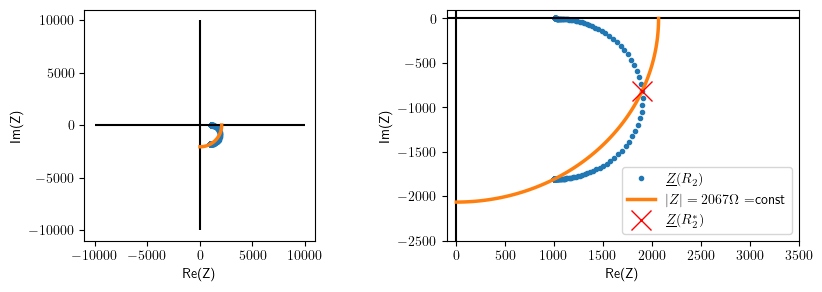

In [5]:

#%matplotlib qt
# %matplotlib inline

rr = np.logspace(0, 8, 200)[::-1]

def plot(ax, axis=None):
    zz = Z_func(2*np.pi*400, np.logspace(.5, 8, 200))
    ax.plot(np.real(zz), np.imag(zz), ".", label=r"$\underline{Z}(R_2)$")

    # Achsenkreuz
    k = 1e4; ax.vlines([0], -k, k, "k"); ax.hlines([0], -k, k, "k")

    # Viertelkreis:
    
    radius = np.abs(zz[-1]) ##:
    ttheta = np.linspace(0, -np.pi/2, 100)
    ax.plot(radius * np.cos(ttheta), radius * np.sin(ttheta), linewidth=2.5, label=r"$|Z|=2067\Omega$ =const")  # Draw the arc

    # Schnittpunkt
    Z_cross = np.atleast_1d(Z_func(2*np.pi*400, float(R2_star)))

    if axis is None:
        ax.set_aspect('equal')
    else:
        ax.axis(axis)
        ax.plot(np.real(Z_cross), np.imag(Z_cross), "rx", ms=15, label=r"$\underline{Z}(R_2^*)$")
        plt.legend()

    ax.set_xlabel("Re(Z)")
    ax.set_ylabel("Im(Z)")
        
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3))
plot(ax1)
plot(ax2, axis=[-100, 3500, -2.5e3, 100])



# Qualitative Erklärung des Pradoxons:

- Gesamtimpedanz: $Z = \underbrace{Z_1}_{R_1} + \underbrace{Z_2}_{\tfrac{1}{j\omega C}||R_2}$.
- Ausgangspunkt $R_2 = \infty$ (Schalter offen).
- $Z_2 = -\frac{j}{\omega C}$ ist rein imaginär (Phasenwinkel $\varphi_2 = -90°$)
- $Z = Z_1 + Z_2$ zeigt schräg nach unten in den 4. Quadranten.
- Wenn jetzt $R_2$ von $\infty$ ausgehend kleiner wird, dann wird $|Z_2|$ zwar kleiner (wie bei einer Parallelschaltung erwartbar), **aber** $\varphi_2$ (der Phasenwinkel von $Z_2$) wird auch kleiner, weil $Z_2$ jetzt einen Realteil bekommt. Je kleiner $R_2$ wird, um so größer wird der reelle Anteil von $Z_2$ und um so kleiner also $\varphi_2$. Dadurch zeigt $Z_2$ immer mehr in die gleiche Richtung wie $Z_1$ (rein reell, $\varphi_1 = 0$). Bei der vektoriellen Addition $Z = Z_1 + Z_2$ wird dann in einem bestimmten Wertebereich von $R_2$ die Längenverkürzung von $|Z_2|$ dadurch überkompensiert, dass $Z_2$ mehr in Richtung von $Z_1$ zeigt (kleinerer Winkelunterschied).
